In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_benin = pd.read_csv(
    r'C:\Users\ZAK-TECH\Desktop\KAIM Week0\solar-challenge-week0\data\benin-parakou_eda.csv',
    encoding='latin1')

df_togo = pd.read_csv(r'C:\Users\ZAK-TECH\Desktop\KAIM Week0\solar-challenge-week0\data\togo-dapaong_eda.csv', 
                      encoding='latin1')
df_sierralenone = pd.read_csv(r'C:\Users\ZAK-TECH\Desktop\KAIM Week0\solar-challenge-week0\data\sierraleone-bumbuna.csv')


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_15624\2572617678.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benin = pd.read_csv(
C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_15624\2572617678.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_togo = pd.read_csv(r'C:\Users\ZAK-TECH\Desktop\KAIM Week0\solar-challenge-week0\data\togo-dapaong_eda.csv',


Combine the datasets

In [4]:
df_benin['Country'] = 'Benin'
df_togo['Country'] = 'Togo'
df_sierralenone['Country'] = 'Sierra Leone'

df_all = pd.concat([df_benin, df_togo, df_sierralenone], ignore_index=True)




In [11]:
for col in ['GHI', 'DNI', 'DHI']:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce')
df_all_clean = df_all.dropna(subset=['GHI', 'DNI', 'DHI'])


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_15624\237402082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


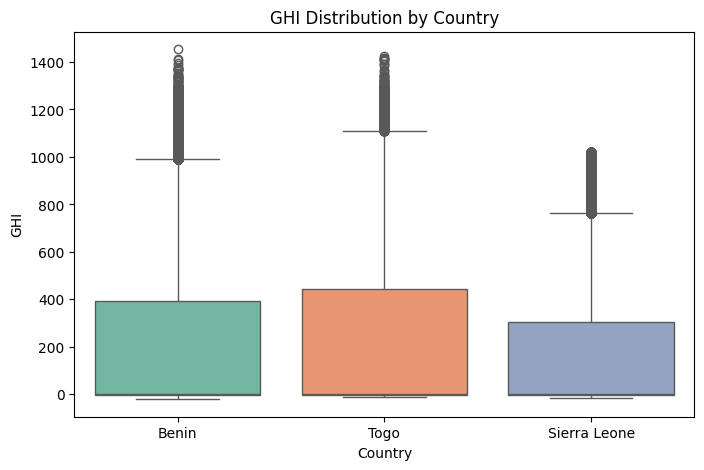

C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_15624\237402082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


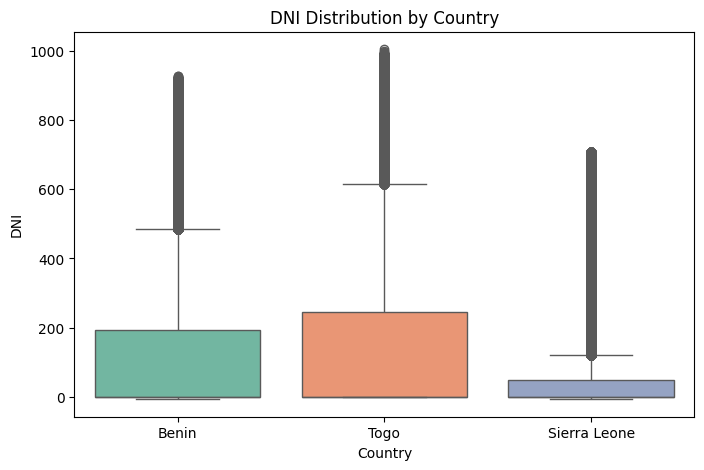

C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_15624\237402082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


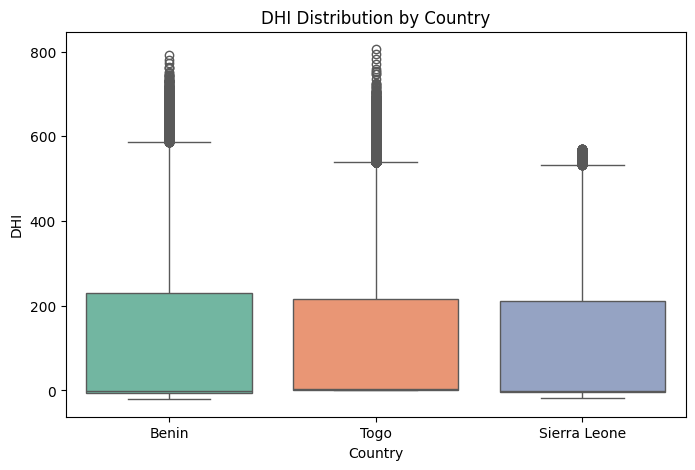

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.show()


Compute summary statistics

In [14]:
summary = df_all_clean.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         216.758160   -0.4  311.803513  132.359358   -0.1  228.928575   
Sierra Leone  171.045078   -0.5  264.085786   92.764159   -0.1  184.785751   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         116.453812   -0.4  161.656824  
Sierra Leone  103.941897   -0.8  151.303886  
Togo          116.444352    2.5  156.520714

In [16]:
benin_ghi = df_all_clean[df_all_clean['Country'] == 'Benin']['GHI']
togo_ghi = df_all_clean[df_all_clean['Country'] == 'Togo']['GHI']
sierra_ghi = df_all_clean[df_all_clean['Country'] == 'Sierra Leone']['GHI']


In [19]:
from scipy.stats import f_oneway

anova_result = f_oneway(benin_ghi, togo_ghi, sierra_ghi)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

print('''\nInterpretation:
p < 0.05 → statistically significant differences between countries\n
p ≥ 0.05 → no strong evidence of differences''')


ANOVA F-statistic: 5399.8930004222
ANOVA p-value: 0.0

Interpretation:
p < 0.05 → statistically significant differences between countries

p ≥ 0.05 → no strong evidence of differences


### Key Observations

- **Highest GHI**: Country X shows the highest median GHI, suggesting the greatest solar potential.
- **Variability**: Country Y has the largest standard deviation for DNI, indicating more variability in direct sunlight.
- **Statistical significance**: One-way ANOVA on GHI tell us that the differences between countries are statistically significant.


Compute average GHI by country

In [20]:
avg_ghi = df_all_clean.groupby('Country')['GHI'].mean().sort_values(ascending=False)


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_15624\707073148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')


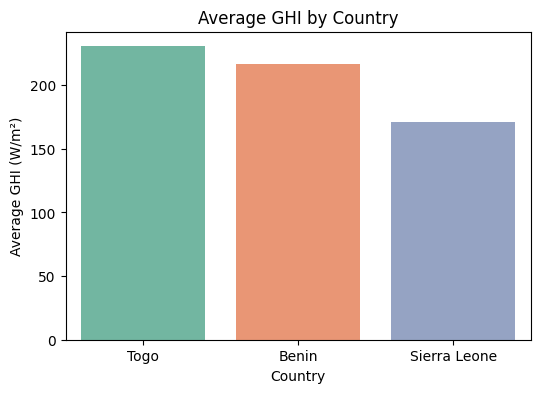

In [22]:

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Country')
plt.show()


✅ Final notebook checklist

Load and clean datasets → add Country column

Convert GHI/DNI/DHI to numeric → drop or handle NaNs

Boxplots → all three countries side by side

Summary table → mean, median, SD

Statistical testing → ANOVA/Kruskal-Wallis, include p-values

Markdown → Key observations (3 bullets, actionable insights)

Bar chart → ranking countries by average GHI